In [5]:
import pandas as pd
#import pandas_datareader as pdr---- this library is used to read from stock point data

In [3]:
df = pd.read_csv(r"C:\Users\pavani\OneDrive\Documents\ABCB.csv")

In [4]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,19-05-1994,5.065844,5.065844,134232,5.369794,5.268477,3.038053
1,20-05-1994,5.065844,5.167161,54285,5.369794,5.268477,3.038053
2,23-05-1994,5.065844,5.268477,16532,5.268477,5.065844,2.921204
3,24-05-1994,5.065844,5.268477,7649,5.268477,5.065844,2.921204
4,25-05-1994,5.065844,5.167161,13325,5.167161,5.065844,2.921204
...,...,...,...,...,...,...,...
7189,06-12-2022,49.919998,50.560001,379200,50.849998,50.310001,50.310001
7190,07-12-2022,49.720001,50.070000,221900,50.759998,50.360001,50.360001
7191,08-12-2022,50.000000,50.540001,362000,51.040001,50.320000,50.320000
7192,09-12-2022,49.830002,50.000000,264500,50.669998,50.259998,50.259998


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7194 entries, 0 to 7193
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7194 non-null   object 
 1   Low             7194 non-null   float64
 2   Open            7194 non-null   float64
 3   Volume          7194 non-null   int64  
 4   High            7194 non-null   float64
 5   Close           7194 non-null   float64
 6   Adjusted Close  7194 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 393.5+ KB


In [7]:
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,7194.000000,7194.000000,7.194000e+03,7194.000000,7194.000000,7194.000000
mean,19.857832,20.159893,1.103076e+05,20.442681,20.160092,18.038728
std,14.001880,14.192495,1.910818e+05,14.367590,14.192230,14.559369
min,3.355615,3.618228,0.000000e+00,3.890568,3.559870,2.862780
25%,9.456241,9.591331,9.377000e+03,9.752028,9.610000,6.998756
50%,13.454881,13.722126,3.320950e+04,13.896622,13.717126,11.726768
75%,25.997500,26.357501,1.399908e+05,26.699022,26.366243,24.094762
max,57.500000,59.509998,4.545600e+06,59.849998,58.520000,58.349785


In [8]:
df.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [9]:
df1 = df.reset_index()['Close']

In [11]:
df1.shape

(7194,)

In [12]:
import matplotlib.pyplot as plt

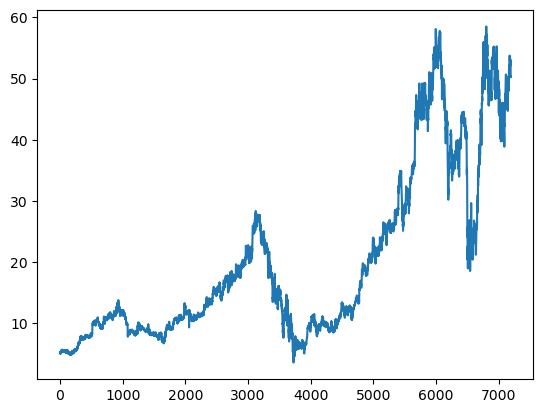

In [13]:
plt.plot(df1)

In [14]:
# scale the data into a particular format as it is a importtant preprocessing technique

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc = MinMaxScaler()

In [20]:
df1_aa = sc.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1_aa

array([[0.03108812],
       [0.03108812],
       [0.02740121],
       ...,
       [0.85080092],
       [0.8497092 ],
       [0.85116483]])

In [22]:
# divide the data in a new formatt as it is a timeseries data

In [51]:
training_size=int(len(df1_aa)*0.75)
test_size = len(df1_aa)-training_size
train_data = df1_aa[0:training_size] # upto training_size it considers as training data upto that index shown below

In [52]:
train_data.shape

(5395, 1)

In [55]:
test_data = df1_aa[training_size:len(df1_aa)]

In [56]:
test_data.shape

(1799, 1)

In [27]:
len(train_data)

5395

In [57]:
train_data

array([[0.03108812],
       [0.03108812],
       [0.02740121],
       ...,
       [0.45833461],
       [0.45524146],
       [0.45997216]])

In [58]:
test_data

array([[0.45433172],
       [0.45687901],
       [0.48380761],
       ...,
       [0.85080092],
       [0.8497092 ],
       [0.85116483]])

In [63]:
def create_dataset(dataset,time_step):
    X_train,y_train = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        X_train.append(a)
        y_train.append(dataset[i+time_step,0])
    return np.array(X_train), np.array(y_train)     

In [66]:
time_step =1000
X_train,y_train = create_dataset(train_data,time_step=100)
X_test,y_test = create_dataset(test_data,time_step=100)   # taking 1000X_train days stocks as i record

In [68]:
X_train.shape

(5294, 100)

In [69]:
y_train.shape

(5294,)

In [79]:
X_trained = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_tested = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [82]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [83]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
83/83 [==============================] - 38s 285ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 2/10
83/83 [==============================] - 21s 248ms/step - loss: 1.9134e-04 - val_loss: 0.0024
Epoch 3/10
83/83 [==============================] - 19s 234ms/step - loss: 1.7919e-04 - val_loss: 0.0030
Epoch 4/10
83/83 [==============================] - 19s 234ms/step - loss: 1.6649e-04 - val_loss: 0.0022
Epoch 5/10
83/83 [==============================] - 21s 246ms/step - loss: 1.5529e-04 - val_loss: 0.0018
Epoch 6/10
83/83 [==============================] - 20s 246ms/step - loss: 1.4870e-04 - val_loss: 0.0014
Epoch 7/10
83/83 [==============================] - 22s 265ms/step - loss: 1.5111e-04 - val_loss: 0.0016
Epoch 8/10
83/83 [==============================] - 20s 237ms/step - loss: 1.2790e-04 - val_loss: 0.0012
Epoch 9/10
83/83 [==============================] - 19s 230ms/step - loss: 1.1815e-04 - val_loss: 0.0011
Epoch 10/10
83/83 [==============================] - 19s 22

In [89]:
train_predict = model.predict(X_test)

54/54 [==============================] - 2s 39ms/step


In [90]:
train_predict

array([[0.45069802],
       [0.4520941 ],
       [0.45356545],
       ...,
       [0.86555725],
       [0.86125433],
       [0.8560515 ]], dtype=float32)

In [91]:
re = sc.inverse_transform(train_predict)

In [92]:
re

array([[28.330294],
       [28.40702 ],
       [28.487886],
       ...,
       [51.131012],
       [50.894524],
       [50.608574]], dtype=float32)

In [93]:
df1

0        5.268477
1        5.268477
2        5.065844
3        5.065844
4        5.065844
          ...    
7189    50.310001
7190    50.360001
7191    50.320000
7192    50.259998
7193    50.340000
Name: Close, Length: 7194, dtype: float64